In [2]:
import numpy as np
import pandas as pd
import matplotlib as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Import Data

In [3]:
red_cross = pd.read_csv("redcross-major-disaster.csv")
red_cross.head(2)

,division,year,disaster_number,incident_number,incident_name,start_date,fiscal_year,incident_state,disaster_type,disaster_level,total_destroyed_major,total_units_affected,verified_deaths,verified_hospitalized_ill_injured,total_client_shelters_opened,total_overnight_shelter_stays,x_new_shelter_registrations,total_volunters
0,SWARM,2014,685-14,108461,Everman TX 1/14 MFF,1/2/14,2014,TX,FIR,2,0,0,0,4,1,42,21,42
1,Northeast,2014,693-14,108530,N Attleboro MA 1/14 MFF,1/3/14,2014,MA,FIR,2,0,0,0,0,0,0,0,11


# Data Cleaning

In [4]:
red_cross.drop_duplicates(inplace=True)
red_cross.drop(['disaster_number','fiscal_year', 'incident_number'], axis=1, inplace=True)
red_cross = red_cross[red_cross.incident_state != 'ZZ']

In [5]:
red_cross.groupby(by = 'year').sum()

,disaster_level,total_destroyed_major,total_units_affected,verified_deaths,verified_hospitalized_ill_injured,total_client_shelters_opened,total_overnight_shelter_stays,x_new_shelter_registrations,total_volunters
year,,,,,,,,,
2000,668,12666,113593,272,2682,492,0,20938,23176
2001,698,31363,100875,2228,5677,525,39,23522,81097
2002,715,26904,690147,207,3869,672,0,69906,34158
2003,553,39625,758122,405,5297,759,0,61479,41431
2004,378,84443,352276,241,6818,1850,0,388862,43544
2005,614,365660,1379496,364,201500,1821,0,460113,245931
2006,506,14914,1140909,205,1791,587,12851,27428,18926
2007,590,21036,1295502,270,2119,686,96551,31784,27536
2008,546,49830,535564,308,2797,1493,532536,133965,45520


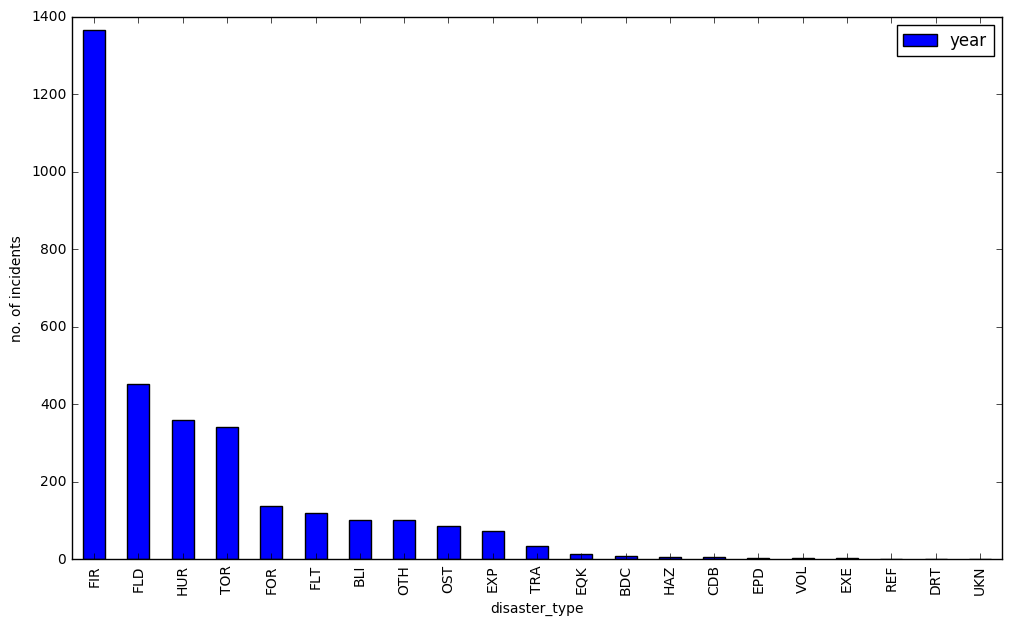

In [6]:
incident = red_cross.groupby('disaster_type').agg({'year':'count'}) 
incident.sort_values('year', inplace=True, ascending=False)
incident.plot.bar(figsize = (12,7))
plt.ylabel('no. of incidents')

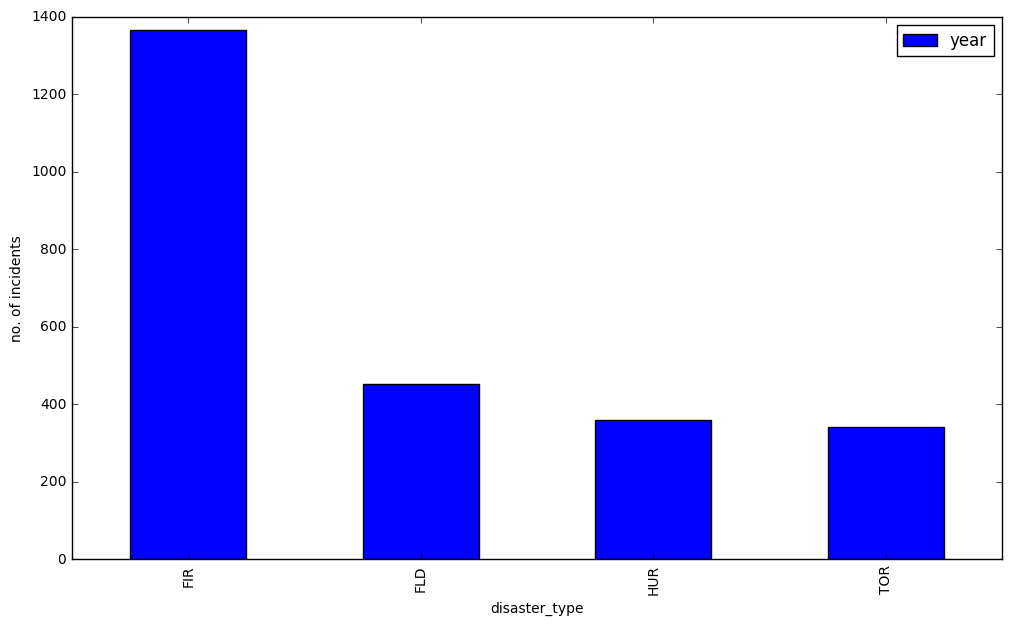

In [7]:
filter_data = red_cross[((red_cross.disaster_type == 'FIR') | (red_cross.disaster_type == 'FLD') \
| (red_cross.disaster_type == u'HUR') | (red_cross.disaster_type == u'TOR'))]

incident = filter_data.groupby('disaster_type').agg({'year':'count'}) 
incident.sort_values('year', inplace=True, ascending=False)
incident.plot.bar(figsize = (12,7))
plt.ylabel('no. of incidents')

In [8]:
# 'x_new_shelter_registrations',  'total_overnight_shelter_stays' , 'total_client_shelters_opened', 'verified_deaths', 'verified_hospitalized_ill_injured'

In [9]:
disaster_dummy = pd.get_dummies(filter_data.disaster_type)
incident_dummy = pd.get_dummies(filter_data.disaster_level)
data  = disaster_dummy.join(filter_data)
data  = incident_dummy.join(data)
data.drop(['division', 'year', 'incident_name', 'start_date', 'incident_state'], axis=1, inplace=True)
data.drop(['disaster_type'], axis=1, inplace=True)
data.drop(['disaster_level'], axis=1, inplace=True)
data.columns

Index([                                   1,
                                          2,
                                          3,
                                          4,
                                          5,
                                          6,
                                          7,
                                     u'FIR',
                                     u'FLD',
                                     u'HUR',
                                     u'TOR',
                   u'total_destroyed_major',
                    u'total_units_affected',
                         u'verified_deaths',
       u'verified_hospitalized_ill_injured',
            u'total_client_shelters_opened',
           u'total_overnight_shelter_stays',
             u'x_new_shelter_registrations',
                         u'total_volunters'],
      dtype='object')

In [10]:
data.describe()

,1,2,3,4,5,6,7,FIR,FLD,HUR,TOR,total_destroyed_major,total_units_affected,verified_deaths,verified_hospitalized_ill_injured,total_client_shelters_opened,total_overnight_shelter_stays,x_new_shelter_registrations,total_volunters
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000
mean,0.140985,0.590548,0.160842,0.086180,0.006354,0.003177,0.011914,0.542097,0.179508,0.142971,0.135425,290.694202,1176.328435,1.144559,88.661636,3.769261,333.988880,462.167990,204.395155
std,0.348075,0.491830,0.367458,0.280685,0.079476,0.056288,0.108522,0.498324,0.383853,0.350112,0.342245,6983.157634,17554.377705,7.362334,3358.346980,18.778627,5119.813103,6004.727325,1343.140732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,43.750000,116.000000,0.000000,3.000000,1.000000,0.000000,28.000000,73.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,345100.000000,702258.000000,248.000000,168178.000000,392.000000,217449.000000,180475.000000,33337.000000


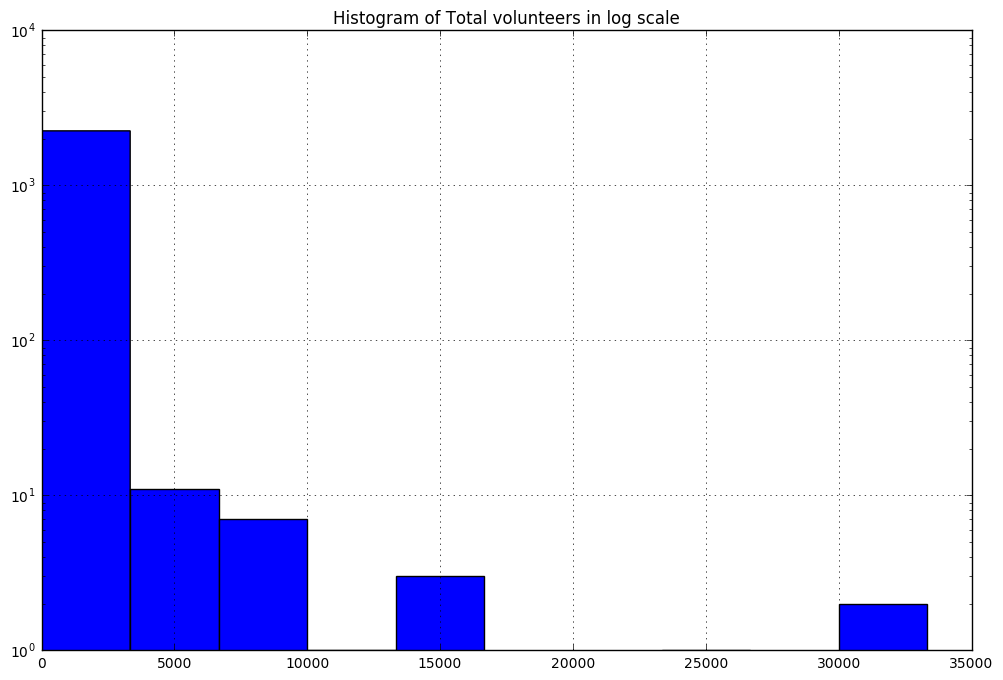

In [23]:
clean_data = data[(data.total_volunters > 1)]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
clean_data.total_volunters.hist()
plt.title('Histogram of Total volunteers in log scale')
ax.set_yscale('log')

In [18]:
# clean_data = data[(data.total_volunters > 1) & (data.total_volunters < 20000)]
X = clean_data.iloc[:,:-1]
Y = clean_data.loc[:,'total_volunters']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.33, random_state=99)

# Random Forest with parameter max_features = 'sqrt' and max_depth

In [19]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import GridSearchCV
param_grid ={'max_depth' : range(5, 100, 2)}
rf = RFR(max_features = 'sqrt', random_state=5)
gr=GridSearchCV(rf,param_grid=param_grid)
rs=gr.fit(X_train ,np.log10(Y_train))
print rs.score(X_test ,np.log10(Y_test))

0.805742785682


# Gradient Boosting with parameters (learning_rate=0.15,  loss='huber', max_features = 'sqrt')

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid ={'max_depth' : range(5, 100 , 2)}
est = GradientBoostingRegressor(learning_rate=0.15, random_state=0, loss='huber', max_features = 'sqrt')
gr=GridSearchCV(est,param_grid=param_grid)
gb = gr.fit(X_train, np.log10(Y_train))
gb.score(X_test, np.log10(Y_test))

0.80938528590209391

# Gradient Boosting with parameters (max_depth = 5 loss='ls', max_features = 'sqrt')

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid ={'learning_rate' : np.linspace(0.075, 0.15, 25)}
est = GradientBoostingRegressor(max_depth = 5, random_state=0, loss='ls', max_features = 'sqrt')
gr=GridSearchCV(est,param_grid=param_grid)
gb = gr.fit(X_train, np.log10(Y_train))
gb.score(X_test, np.log10(Y_test))

0.81807673205417863